In [3]:
import os
import pandas as pd
from tqdm import tqdm
from collections import Counter
from src.helpers import get_project_dir
from src.plotters import scatter_plot
from src.preprocessors import preprocess_type
from src.aggregators import collector
import warnings
warnings.filterwarnings("ignore")

In [2]:
PROJECT_PATH = get_project_dir()
PATH_TO_DATA = os.path.join(PROJECT_PATH, 'data/preprocessed')

In [4]:
print('+'+'-'*60)
print('| Collecting types ...')
items = collector(path=PATH_TO_DATA,
                  filename='main.csv',
                  chunksize=200000,
                  n_rows=19291934,
                  columns_to_process = ['type'],
                  renamed_columns = ['type'],
                  prep_f=None)
print('| Done ')
print('+'+'-'*60)

+------------------------------------------------------------
| Collecting types ...


CHUNKS: 100%|██████████| 97/97 [01:23<00:00,  1.16it/s]

| Done 
+------------------------------------------------------------


In [5]:
counts = Counter(items['items'].values[0])
df = pd.DataFrame(columns=['type', 'count'])
df['type'] = list(counts.keys())
df['count'] = list(counts.values())
df = df.sort_values(by='count', ascending=False).reset_index(drop=True)

In [6]:
df['reformed_type'] = list(tqdm(map(lambda x: preprocess_type(x), df['type']), total=len(df)))

100%|██████████| 12343/12343 [00:23<00:00, 516.44it/s]


In [8]:
df.to_excel(os.path.join(PROJECT_PATH, 'data/types.xlsx'), index=False)

In [26]:
df2 = df[['reformed_type','count']].groupby('reformed_type').sum().sort_values(by='count', ascending=False).reset_index()

In [27]:
df2

,reformed_type,count
0,экономика,1587859
1,мир,1413025
2,общество,1210540
3,политика,1023579
4,россия,723070
...,...,...
11873,репортаж происшествие культура кавказ,1
11874,репортаж происшествие азия выбор редакция экск...,1
11875,репортаж программа вечер экономика общество ре...,1
11876,репортаж программа вечер россия выбор редакция...,1


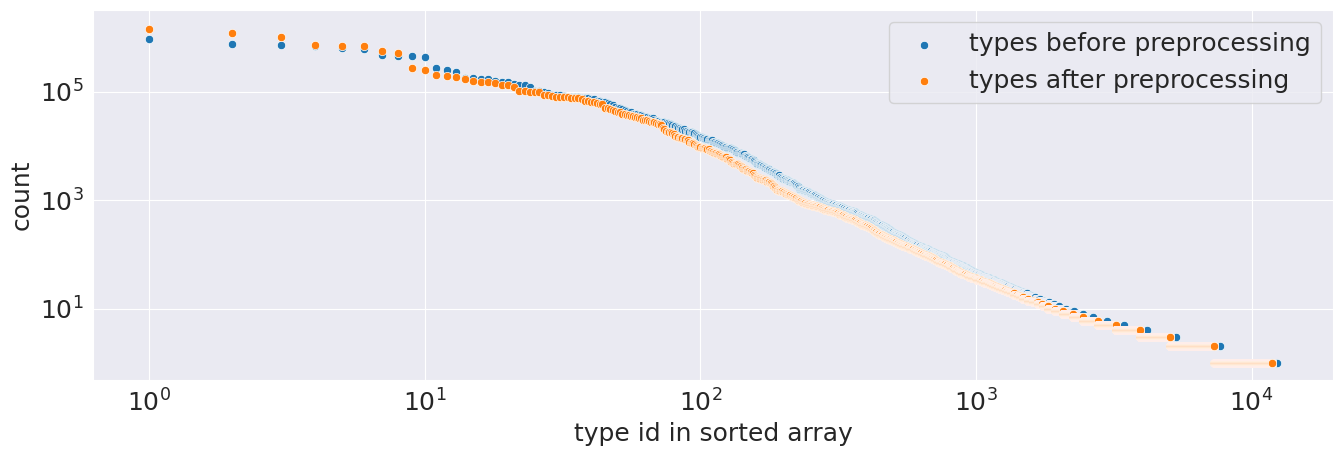

In [41]:
scatter_plot(x=[df.index, df2.index], y=[df['count'], df2['count']], lw=3,
             multiple=True,
             x_label='type id in sorted array', y_label='count', labels=['types before preprocessing', 'types after preprocessing'], aspect_ratio=0.3,
             x_scale='log', y_scale='log')